In [24]:
# Import libraries
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from matplotlib import pyplot as plt
from scipy.spatial.distance import cdist

import numpy as np

import seaborn as sns
sns.set_style()

In [46]:
# Generate synthetic data - No need for this when data is given
X, true_labels = make_blobs(n_samples=2000,
                                  centers=6,
                                  cluster_std=2.75,
                                  random_state=42)


In [26]:
# initialize MinMax scaler : feature range = (0, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
# fit the scaler on X and transform
X_scaled = scaler.fit_transform(X)

In [27]:
# print array shape
X.shape

(2000, 2)

In [28]:
# print samples of unscaled data
X[:4]

array([[ 5.87118551,  0.47060025],
       [-2.03295008, 10.07390892],
       [-7.3825924 , -3.09919944],
       [-4.58916217,  5.10308843]])

In [29]:
# print samples of scaled data : ranges between 0 and 1
X_scaled[:4]

array([[0.80190815, 0.44646612],
       [0.53236694, 0.72421526],
       [0.34993724, 0.34321954],
       [0.44519681, 0.58044802]])

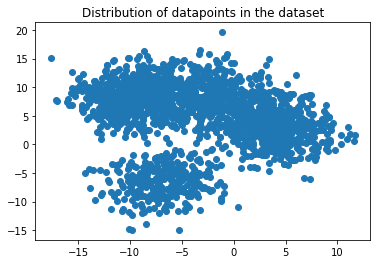

In [53]:
# visualize the dataset
plt.plot()
plt.title('Dataset')
plt.scatter(X[:, 0], X[:, 1])
plt.title("Distribution of datapoints in the dataset")
plt.savefig("data_plot.jpg")
plt.show()

### Elbow method

In [31]:
distortios = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_scaled)
    kmeanModel.fit(X_scaled)
    
    distortios.append(sum(np.min(cdist(X_scaled, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_scaled.shape[0])
    inertias.append(kmeanModel.inertia_)
    mapping1[k] = sum(np.min(cdist(X_scaled, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_scaled.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [32]:
mapping1

{1: 0.25305737853625226,
 2: 0.18077904820069424,
 3: 0.12444441265816623,
 4: 0.10388748907100832,
 5: 0.09581366562560582,
 6: 0.08962105974918766,
 7: 0.08541042366436698,
 8: 0.08002050476675741,
 9: 0.07609463025562413}

In [33]:
mapping2

{1: 148.63182815389024,
 2: 84.62775409095795,
 3: 38.81037765071492,
 4: 26.904193987138314,
 5: 23.11399138599597,
 6: 20.378675491745362,
 7: 18.320771530644404,
 8: 16.17648960851923,
 9: 14.394904065430287}

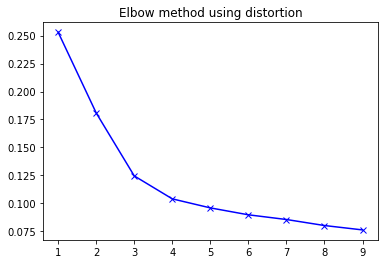

In [34]:
plt.plot(K, distortios, 'bx-')
plt.title("Elbow method using distortion")
plt.savefig("distortion-elbow_plot.jpg")
plt.show()

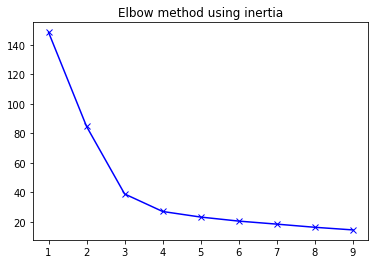

In [35]:
plt.plot(K, inertias, 'bx-')
plt.title("Elbow method using inertia")
plt.savefig("inertia-elbow_plot.jpg")

To determine the optimal number of clusters, select the value of k at the elbow ie 3 
The elbow is the point where distortion or inertia start

In [36]:
# Initialize the Kmeans object with k = 5
kmeans = KMeans(n_clusters=3)

In [37]:
# fit the model and predict the classes
label = kmeans.fit_predict(X)

In [38]:
label

array([0, 1, 2, ..., 2, 2, 1])

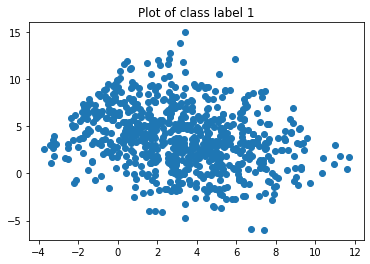

In [39]:
# visualize cluster with label 0
label0 = X[label == 0]

# plotting results
plt.scatter(label0[:, 0], label0[:, 1])
plt.title("Plot of class label 1")
plt.savefig("label0_plot.jpg")
plt.show()

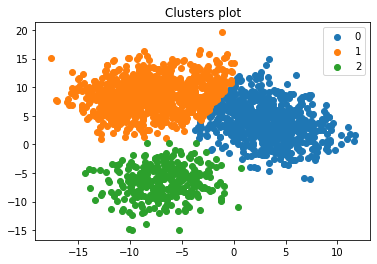

In [40]:
# Plot all clusters
u_labels = np.unique(label)

# plotting results
for i in u_labels:
    plt.scatter(X[label == i, 0], X[label == i, 1], label=i)
plt.legend()
plt.title("Clusters plot")
plt.savefig("cluster_plot.jpg")
plt.show()

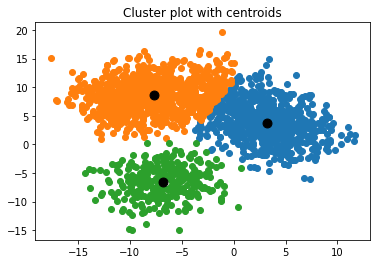

In [41]:
# Plotting cluster centroids
# Get the centroids
centroids = kmeans.cluster_centers_
ulabels = np.unique(label)

# plotting results
for i in u_labels:
    plt.scatter(X[label == i, 0], X[label == i, 1], label=i)
    
plt.scatter(centroids[:, 0], centroids[:, 1], s=80, color='k')
plt.title("Cluster plot with centroids")
plt.savefig("centroid_plot.jpg")

In [42]:
# You can reverse scaling / scaler.inverse_transform() to plot actual values (all plots)